In [2]:
!pip install -Uqq fastbook


import fastbook
from fastbook import *
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.1 MB/s eta 0:00:00
Mounted at /content/gdrive


In [49]:
! [ -e /content ] && pip install kaggle waterfallcharts treeinterpreter dtreeviz

  Preparing metadata (setup.py) ... done
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3389 sha256=7aaa0500ef1f86b8d230dd313ad6ce7673d55e681ae67185fba31abf29eaec4c
  Stored in directory: /root/.cache/pip/wheels/bd/34/6c/58fce34a3b8ec5607aff650db14ceb41db8223ac217423371b
Successfully built waterfallcharts


In [52]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [53]:

from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [4]:
from fastai.tabular.all import *

In [5]:
creds = '{"username":"fakhariqbal","key":"1ea48243cb414a6b174a11e4f33d4bcf"}'

In [6]:
#cred_path = Path('~/.kaggle/kaggle.json').expanduser()
#if not cred_path.exists():
#    cred_path.parent.mkdir(exist_ok=True)
#    cred_path.write_text(creds)
#    cred_path.chmod(0o600)

In [7]:

#hide
#Path.BASE_PATH = path

In [8]:
path = Path('bluebook')

In [10]:
import zipfile

def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Example usage:
zip_file_path = path / 'bluebook-for-bulldozers.zip'
extract_to_path = path / 'extracted_folder'
extract_zip(path/'bluebook-for-bulldozers.zip', path)

In [11]:
path.ls(file_type='text')

(#7) [Path('bluebook/Test.csv'),Path('bluebook/median_benchmark.csv'),Path('bluebook/Machine_Appendix.csv'),Path('bluebook/random_forest_benchmark_test.csv'),Path('bluebook/ValidSolution.csv'),Path('bluebook/Valid.csv'),Path('bluebook/TrainAndValid.csv')]

In [12]:
df = pd.read_csv(path/'TrainAndValid.csv',low_memory=False)

df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [13]:
df['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [14]:
sizes = 'Large','Large / Medium', 'Medium','Small','Mini','Compact'

df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes,ordered=True,inplace=True)

<ipython-input-14-71a911765700>:4: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.


In [15]:
dep_var = 'SalePrice'
df[dep_var] = np.log(df[dep_var])

In [16]:
df = add_datepart(df,'saledate')


In [17]:
df_test = pd.read_csv(path/'Test.csv',low_memory=False)
df_test = add_datepart(df_test,'saledate')

In [18]:
" ".join(o for o in df_test.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [19]:
cond = (df.saleYear <2011) | (df.saleMonth <10)
train_idx = np.where(cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx), list(valid_idx))

In [20]:
procs = [Categorify, FillMissing]

cont,cat = cont_cat_split(df,1,dep_var=dep_var)

In [21]:
to = TabularPandas(df,procs,cat,cont,y_names=dep_var,splits=splits)

In [22]:
len(to.train), len(to.valid)

(404710, 7988)

In [23]:
to.show(10)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340
3,High,PC120-6E,PC120,#na#,-6E,#na#,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,#na#,EROPS w AC,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139251,1026470,332,121,3.0,2001,3486.0,2011,5,20,19,3,139,1.305763e+09,10.558414
4,Medium,S175,S175,#na#,#na#,#na#,#na#,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,EROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139253,1057373,17311,121,3.0,2007,722.0,2009,7,30,23,3,204,1.248307e+09,9.305651
5,Low,310G,310,G,#na#,#na#,#na#,Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth,Arizona,BL,Backhoe Loaders,Four Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Extended,Powershuttle,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139255,1001274,4605,121,3.0,2004,508.0,2008,12,51,18,3,353,1.229558e+09,10.184900
6,High,790ELC,790,E,#na#,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metric Tons",Florida,TEX,Track Excavators,#na#,EROPS,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,#na#,#na#,#na#,#na#,#na#,None or Unspecified,#na#,#na#,#na#,Steel

In [24]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,...,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,...,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,...,1,1.077754e+09,1,1


In [25]:
save_pickle(path/'to.pkl',to)

In [26]:
to = load_pickle(path/'to.pkl')

In [27]:
xs,y = to.train.xs, to.train.y
valid_xs,valid_y = to.valid.xs, to.valid.y

In [28]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y)

DecisionTreeRegressor(max_leaf_nodes=4)

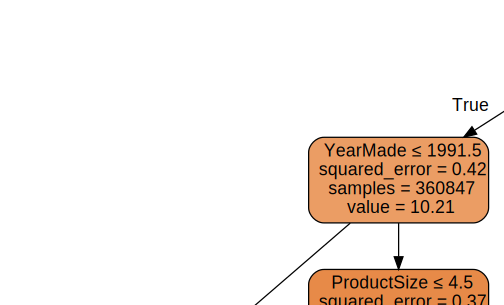

In [31]:
draw_tree(m,xs,size=7,leaves_parallel=True,precision=2)

In [46]:
import dtreeviz
from dtreeviz.trees import *

In [45]:
!pip install --upgrade dtreeviz

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


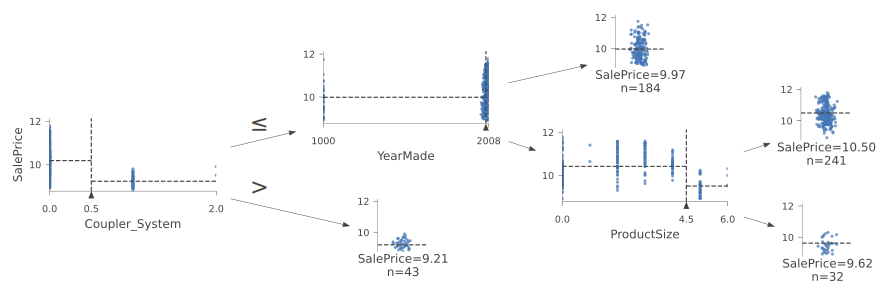

In [55]:


import dtreeviz
samp_idx = np.random.permutation(len(y))[:500]
viz_model=dtreeviz.model(m,
X_train=xs.iloc[samp_idx],
y_train=y.iloc[samp_idx],
feature_names=xs.columns,
target_name=dep_var)

viz_model.view(fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
orientation='LR')


In [56]:
xs.loc[xs['YearMade']<1900, 'YearMade'] = 1950
valid_xs.loc[valid_xs['YearMade']<1900, 'YearMade'] = 1900

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


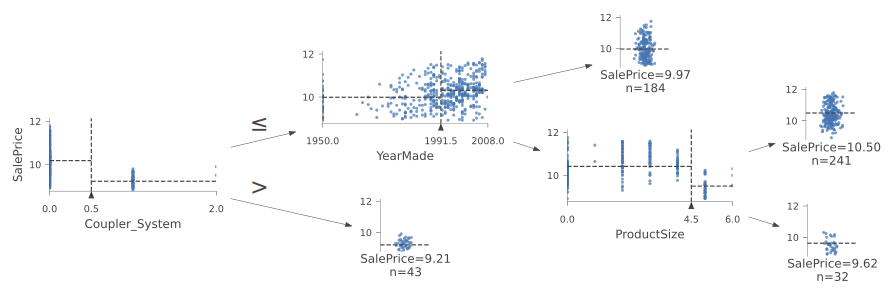

In [57]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs,y)
viz_model=dtreeviz.model(m,
X_train=xs.iloc[samp_idx],
y_train=y.iloc[samp_idx],
feature_names=xs.columns,
target_name=dep_var)

viz_model.view(fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
orientation='LR')

In [58]:
m = DecisionTreeRegressor()
m.fit(xs,y)

DecisionTreeRegressor()

In [59]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()),6)

def m_rmse(m,xs,y): return r_mse(m.predict(xs),y)



In [60]:
m_rmse(m,xs,y)

0.0

In [61]:
m_rmse(m,valid_xs,valid_y)

0.333794

In [63]:
m.get_n_leaves(), len(xs)

(324522, 404710)

In [64]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)


DecisionTreeRegressor(min_samples_leaf=25)

In [65]:
m_rmse(m,xs,y), m_rmse(m,valid_xs,valid_y)

(0.248563, 0.310757)

In [66]:
m.get_n_leaves()

12397

In [67]:
def rf(xs,y,n_estimators=40,max_samples=200_000,
       max_features=0.5,min_samples_leaf=5,**kwargs):
  return RandomForestRegressor(n_jobs=-1,n_estimators=n_estimators,
                               max_samples=max_samples,max_features=max_features,
                               min_samples_leaf=min_samples_leaf,
                               oob_score=True).fit(xs,y)

In [68]:
m = rf(xs,y)

In [69]:
m_rmse(m,xs,y), m_rmse(m,valid_xs,valid_y)

(0.171009, 0.233488)

In [70]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X 

In [71]:
r_mse(preds.mean(0),valid_y)

0.233488

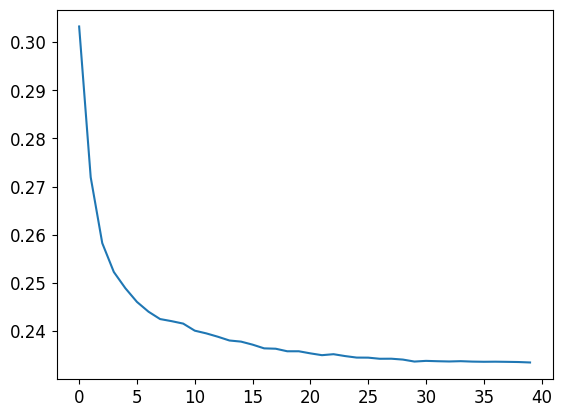

In [75]:
plt.plot([r_mse(preds[:i+1].mean(0),valid_y) for i in range(40)])


In [76]:
r_mse(m.oob_prediction_,y)

0.210851

In [77]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
preds.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X 

(40, 7988)

In [78]:
preds_std = preds.std(0)

In [81]:
preds_std.shape

(7988,)

In [82]:
preds_std[:5]

array([0.26921861, 0.11294088, 0.1263181 , 0.24486721, 0.15947982])

In [83]:
def rf_feat_importance(m,df):
  return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp',ascending=False)

In [84]:
fi = rf_feat_importance(m,xs)
fi[:10]

,cols,imp
57,YearMade,0.181413
6,ProductSize,0.124757
30,Coupler_System,0.075771
7,fiProductClassDesc,0.073465
32,Hydraulics_Flow,0.067460
54,ModelID,0.061594
65,saleElapsed,0.049411
31,Grouser_Tracks,0.048039
3,fiSecondaryDesc,0.039355
1,fiModelDesc,0.031268


In [85]:
def plot_fi(fi):
  return fi.plot('cols','imp','barh',figsize=(12,7),legend=False)

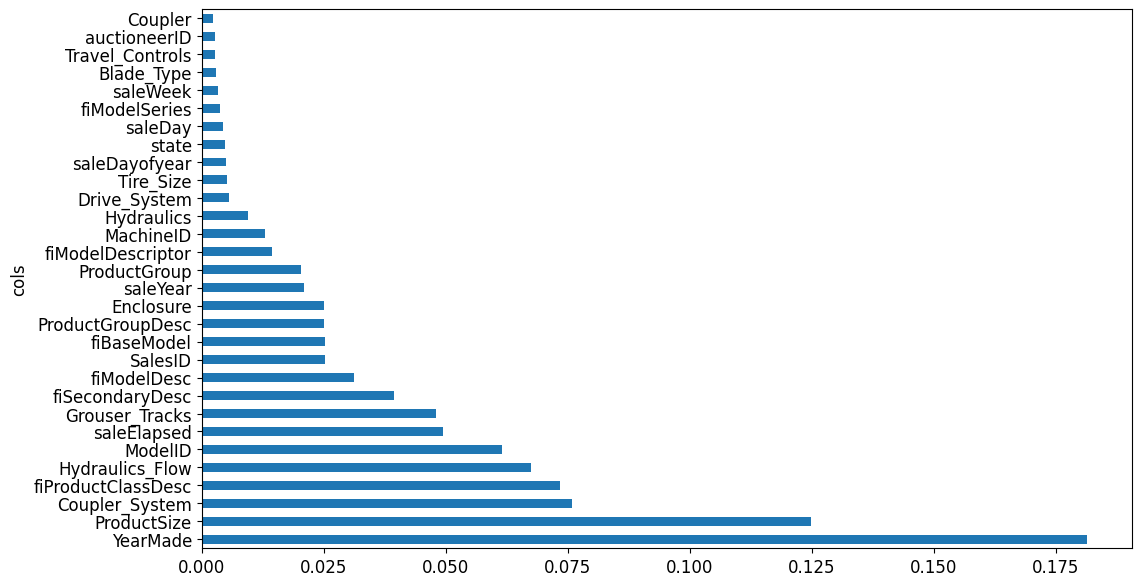

In [87]:
plot_fi(fi[:30]);